<div class="markdown-google-sans">

## <strong>–ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫, –º–æ–¥–µ–ª–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∞ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö</strong>
</div>

In [1]:
from IPython.display import clear_output 
import cv2
# !pip3 install google-colab
# from google.colab.patches import cv2_imshow
clear_output()

In [2]:
# –°–∫–∞—á–∏–≤–∞–Ω–∏–µ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏—è —Å YOLOv5 –∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏
!git clone https://github.com/ultralytics/yolov5
!pip install -r ./yolov5/requirements.txt
clear_output()

In [3]:
# –°–æ–∑–¥–∞—ë–º —Ñ–∞–π–ª –¥–ª—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–∞
!touch ./yolov5/data/custom.yaml

In [6]:
# –ü—Ä–∏–º–µ—Ä–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞. –≤ —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –Ω–∞–∑—ã–≤–∞–µ—Ç–µ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –ø–æ –¥—Ä—É–≥–æ–º—É, –∏–∑–º–µ–Ω–∏—Ç–µ –∏—Ö –Ω–∞–∑–≤–∞–Ω–∏–µ
"""
train: ../price_tags/images/train/,
val:  ../price_tags/images/val/,
test: ../price_tags/images/test/,
# number of classes,
nc: 4,
# class names,
names: ["price_rub", "price_kop", "price_card_rub", "price_card_kop"]
"""

# –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ —Å–æ–∑–¥–∞–Ω–Ω—ã–π —Ä–∞–Ω–µ–µ —Ñ–∞–π–ª —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞—Ç–∞—Å–µ—Ç–µ
my_file = open('/kaggle/working/yolov5/data/custom.yaml','w+')
my_file.write('train: ../price_tags/images/train/ \nval:  ../price_tags/images/val/ \ntest: ../price_tags/images/test/ \n# number of classes \nnc: 4 \n# class names \nnames: ["price_rub", "price_kop", "price_card_rub", "price_card_kop"]')

215

In [7]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–∞–ø–∏—Å–∏ –≤ —Ñ–∞–π–ª —Å—Ç—Ä—É–∫—Ç—É—Ä—ã. –ï—Å–ª–∏ –≤—ã–≤–æ–¥ –ø—É—Å—Ç–æ–π, –ø–æ–≤—Ç–æ—Ä–Ω–æ –∑–∞–ø—É—Å—Ç–∏—Ç–µ –ø—Ä–µ–¥—ã–¥—É—â—É—é —è—á–µ–π–∫—É
my_file.readlines()

['train: ../price_tags/images/train/ \n',
 'val:  ../price_tags/images/val/ \n',
 'test: ../price_tags/images/test/ \n',
 '# number of classes \n',
 'nc: 4 \n',
 '# class names \n',
 'names: ["price_rub", "price_kop", "price_card_rub", "price_card_kop"]']

In [8]:
!pip install imageio
!pip install imutils
clear_output()

In [9]:
import random
from PIL import Image, ImageDraw
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import os
import glob
from imageio import imread
import cv2
# from google.colab.patches import cv2_imshow
import imutils
import json

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

import torch
from IPython.display import Image
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

<div class="markdown-google-sans">

## <strong>–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞</strong>
</div>

In [10]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è —Ñ–∞–π–ª–æ–≤
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

In [11]:
# –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ "–≤–Ω–µ—à–Ω–µ–º" —Ö—Ä–∞–Ω–∏–ª–∏—â–µ, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –∏—Ö –∏–∑–º–µ–Ω—è—Ç—å
!mkdir ./yolov5/price_tags
!mkdir ./yolov5/price_tags/images ./yolov5/price_tags/labels

In [12]:
originImgs = "../input/price-detection-for-yolov5/yolo5_tags/images/"
originLabls = "../input/price-detection-for-yolov5/yolo5_tags/labels/"

# –°–æ–∑–¥–∞—ë–º –ø—É—Å—Ç—ã–µ —Å–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø—É—Ç–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –∏ —Ä–∞–∑–º–µ—Ç–∫–∞–º
images = []
annotations = []

# –ö–æ–ø–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ "–≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–≥–æ" –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ —Ä–∞–Ω–µ–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –ø–∞–ø–∫–∏
for fl in sorted(os.listdir(originImgs)):
    images.append(originImgs+fl)
move_files_to_folder(images, "./yolov5/price_tags/images/")    
for fl in sorted(os.listdir(originLabls)):
    annotations.append(originLabls+fl)
move_files_to_folder(annotations, "./yolov5/price_tags/labels/")  

In [13]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ñ–∞–π–ª–æ–≤. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤ –¥–æ–ª–∂–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å
!ls ./yolov5/price_tags/labels/
print('-----------------')
!ls ./yolov5/price_tags/images/

'photo (1).txt'    'photo (110).txt'  'photo (122).txt'  'photo (137).txt'
'photo (10).txt'   'photo (111).txt'  'photo (123).txt'  'photo (138).txt'
'photo (100).txt'  'photo (112).txt'  'photo (124).txt'  'photo (139).txt'
'photo (101).txt'  'photo (113).txt'  'photo (125).txt'  'photo (14).txt'
'photo (102).txt'  'photo (114).txt'  'photo (126).txt'  'photo (140).txt'
'photo (103).txt'  'photo (115).txt'  'photo (127).txt'  'photo (142).txt'
'photo (104).txt'  'photo (116).txt'  'photo (128).txt'  'photo (143).txt'
'photo (105).txt'  'photo (117).txt'  'photo (129).txt'  'photo (144).txt'
'photo (106).txt'  'photo (118).txt'  'photo (13).txt'	 'photo (145).txt'
'photo (107).txt'  'photo (119).txt'  'photo (130).txt'  'photo (147).txt'
'photo (108).txt'  'photo (12).txt'   'photo (131).txt'  'photo (148).txt'
'photo (109).txt'  'photo (120).txt'  'photo (133).txt'
'photo (11).txt'   'photo (121).txt'  'photo (136).txt'
-----------------
'photo (1).jpg'    'photo (110).jpg'  'photo (1

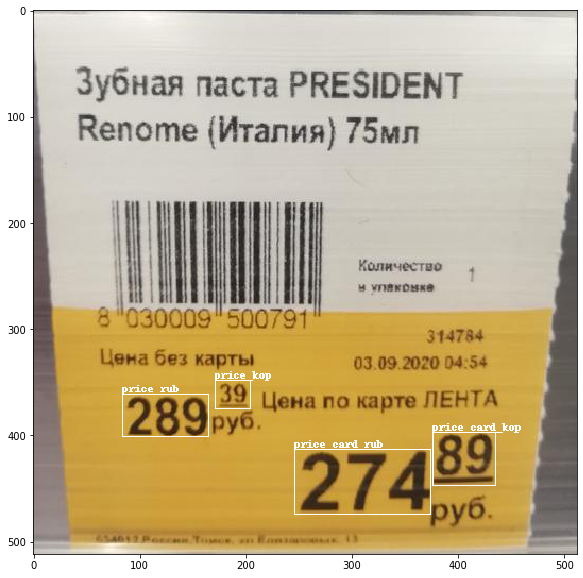

In [14]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ id –∫–ª–∞—Å—Å–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤
class_name_to_id_mapping = {"price_rub": 0,
                            "price_kop": 1,
                            "price_card_rub": 2,
                            "price_card_kop": 3}

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Å–∏–¥–∞ —Ä–∞–Ω–¥–æ–º–Ω–æ–π –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
random.seed(0)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å —Å id –∫–ª–∞—Å—Å–æ–≤
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏ —Ä–∞–∑–º–µ—Ç–∫–∏
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    
    # –ü–æ–ª—É—á–∞–µ–º —Ä–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    w, h = image.size
    
    # –í—ã–≤–æ–¥–∏–º –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    plotted_image = ImageDraw.Draw(image)

    # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –¥–ª—è –ø–æ–∫–∞–∑–∞
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    # –í—ã–≤–æ–¥ —Ä–∞–∑–º–µ—Ç–∫–∏ –∏ –∫–ª–∞—Å—Å–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize = (30,10))
    plt.imshow(np.array(image), interpolation='nearest')
    plt.show()

# –í—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–π —Ñ–∞–π–ª —Ä–∞–∑–º–µ—Ç–∫–∏
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

# –ü–æ–ª—É—á–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–∞–π–ª —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
image = Image.open(image_file)

# –ü–æ–∫–∞–∑ —Ä–∞–∑–º–µ—Ç–∫–∏
plot_bounding_box(image, annotation_list)

In [15]:
# –ó–∞–Ω–æ—Å–∏–º –ø—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ —Ä–∞–∑–º–µ—Ç–∫–∏
images = [os.path.join('./yolov5/price_tags/images', x) for x in os.listdir('./yolov5/price_tags/images')]
annotations = [os.path.join('./yolov5/price_tags/labels', x) for x in os.listdir('./yolov5/price_tags/labels') if x[-3:] == "txt"]

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Ñ–∞–π–ª–æ–≤
images.sort()
annotations.sort()

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

# –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –≤—ã–±–æ—Ä–æ–∫
!mkdir ./yolov5/price_tags/images/train/ ./yolov5/price_tags/images/val/ ./yolov5/price_tags/images/test/ ./yolov5/price_tags/labels/train/ ./yolov5/price_tags/labels/val/ ./yolov5/price_tags/labels/test/

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–µ—Ä–µ–Ω–æ—Å–∞ —Ñ–∞–π–ª–æ–≤
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# –ü–µ—Ä–µ–Ω–æ—Å –≤—ã–±–æ—Ä–æ–∫ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏
move_files_to_folder(train_images, './yolov5/price_tags/images/train/')
move_files_to_folder(val_images, './yolov5/price_tags/images/val/')
move_files_to_folder(test_images, './yolov5/price_tags/images/test/')
move_files_to_folder(train_annotations, './yolov5/price_tags/labels/train/')
move_files_to_folder(val_annotations, './yolov5/price_tags/labels/val/')
move_files_to_folder(test_annotations, './yolov5/price_tags/labels/test/')

In [16]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
!ls ./yolov5/price_tags/labels/test/
print('-------------')
!ls ./yolov5/price_tags/images/test/

'photo (100).txt'  'photo (127).txt'  'photo (147).txt'
'photo (123).txt'  'photo (138).txt'
-------------
'photo (100).jpg'  'photo (127).jpg'  'photo (147).jpg'
'photo (123).jpg'  'photo (138).jpg'


<div class="markdown-google-sans">

## <strong>–û–±—É—á–µ–Ω–∏–µ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏</strong>
</div>

In [17]:
# –ü–µ—Ä–µ—Ö–æ–¥–∏–º –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é yolov5
%cd ./yolov5

/kaggle/working/yolov5


In [18]:
# –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
# –ò–∑–º–µ–Ω–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è —Ç–∞–∫, —á—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è –Ω–∞–∏–ª—É—á—à–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π

# –í—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–¥–µ–ª–∏, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ "/content/yolov5/models/"
# –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –æ–±—É—á–µ–Ω–∏–∏ —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏–º–µ–µ—Ç—Å—è –≤ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–º —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–∏: https://github.com/ultralytics/yolov5
# –ü—Ä–∏ –≤—ã–±–æ—Ä–µ –¥—Ä—É–≥–æ–π –º–æ–¥–µ–ª–∏, –Ω–µ –∑–∞–±—É–¥—å—Ç–µ —Å–º–µ–Ω–∏—Ç—å –≤–µ—Å–∞ –¥–ª—è –º–æ–¥–µ–ª–∏

#                img size  |  model config                               batch size|num of epochs |           dataset                   | weights for model               |   name of model
!python train.py --img 512 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 16 --epochs 100 --data ./data/custom.yaml --weights yolov5s.pt --workers 24 --name yolo_price_det

wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=./data/custom.yaml, hyp=hyp.scratch-med.yaml, epochs=100, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_price_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with http

In [19]:
# –ó–∞–ø—É—Å–∫ –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
!python detect.py --source ./price_tags/images/test/ --weights runs/train/yolo_price_det/weights/best.pt --conf 0.25 --name yolo_price_det

detect: weights=['runs/train/yolo_price_det/weights/best.pt'], source=./price_tags/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_price_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-198-g34c2187 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /kaggle/working/yolov5/price_tags/images/test/photo (100).jpg: 640x640 1 price_kop, 3 price_card_rubs, 2 price_card_kops, 6.9ms
image 2/5 /kaggle/working/yolov5/price_tags/images/test/photo (123).jpg: 640x640 1 price_rub, 3 price_card_rubs, 2 price_card_kops, 7.1ms
image 3/5 /kaggle/working/yolov

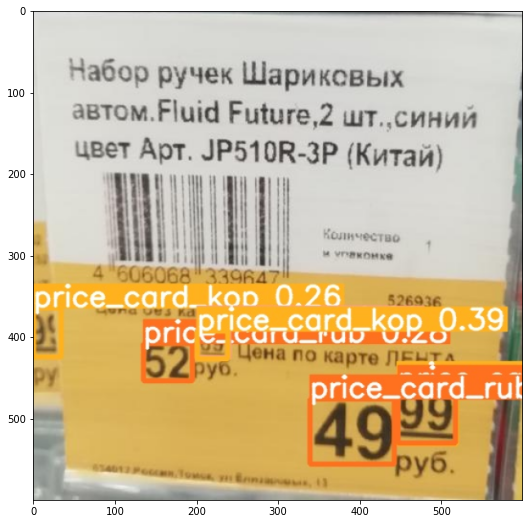

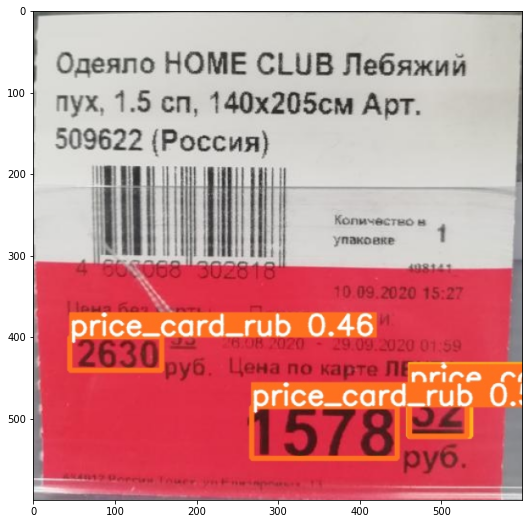

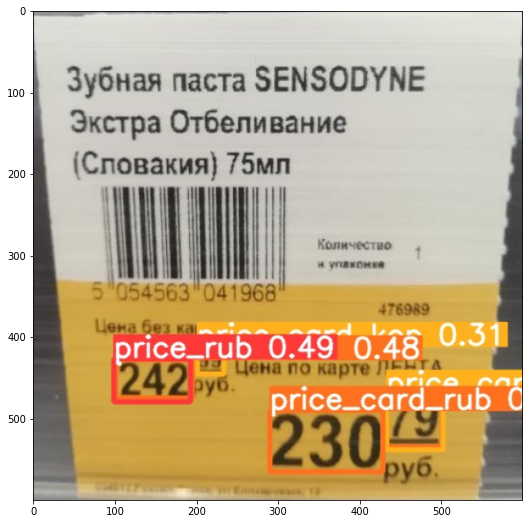

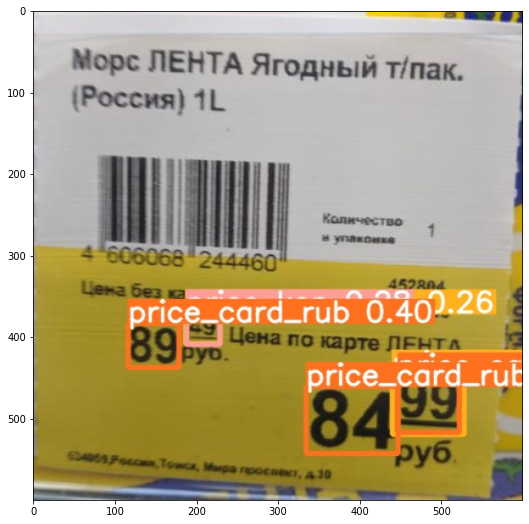

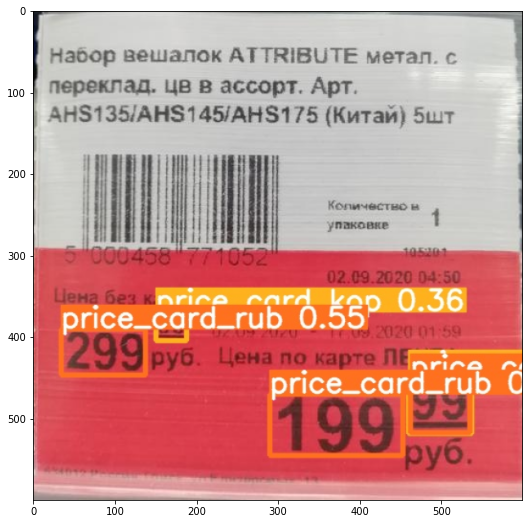

In [21]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—É—Ç—å –∫ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
detections_dir = "./runs/detect/yolo_price_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

# –í—ã–≤–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
# random_detection_image = Image.open(random.choice(detection_images))
# plt.figure(figsize = (30,10))
# plt.imshow(np.array(random_detection_image))
for fl in os.listdir(detections_dir):
  img = cv2.imread(detections_dir+fl)
  img = imutils.resize(img, width=600)
  
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = Image.fromarray(img)
    
#   cv2_imshow(img)
  plt.figure(figsize=(9,9))
  plt.imshow(img)
  plt.show()

In [22]:
# –ó–∞–ø—É—Å–∫ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏, –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–µ—Ç—Ä–∏–∫–∏ mAP50-95 –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ (all) —è–≤–ª—è—é—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
print('test results:')
!python val.py --weights ./runs/train/yolo_price_det/weights/best.pt --data custom.yaml --task test --name yolo_price_det_test

test results:
val: data=/kaggle/working/yolov5/data/custom.yaml, weights=['./runs/train/yolo_price_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_price_det_test, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-198-g34c2187 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /kaggle/working/yolov5/price_tags/labels/test... 5 images, 0 back
test: New cache created: /kaggle/working/yolov5/price_tags/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   
                   all          5         20      0.471      0.898      0.758       0.63
             price_rub          5          5      0.261   

<div class="markdown-google-sans">

## <strong>–†–∞—Å—á—ë—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏</strong>
</div>

In [23]:
def move_files_to_folder(file_path, destination_folder):
        try:
            shutil.copy(file_path, destination_folder)
        except:
            print(f)
            assert False

In [24]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
model = torch.hub.load('ultralytics/yolov5', 'custom', path="./runs/train/yolo_price_det/weights/best.pt")

# –ö–æ–ø–∏—Ä—É–µ–º —Ç–µ—Å—Ç–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–∞ "–≤–Ω–µ—à–Ω–µ–µ" —Ö—Ä–∞–Ω–∏–ª–∏—â–µ
move_files_to_folder("/kaggle/input/price-detection-for-yolov5/yolo5_tags/cropTest.jpg", "/kaggle/working/yolov5/price_tags/cropTest.jpg")

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—É—Ç—å –∫ —Ç–µ—Å—Ç–æ–≤–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é, –≤—ã–¥–∞–Ω–Ω–æ–º—É –í–∞–º
img = "./price_tags/cropTest.jpg"

# –ü–æ–ª—É—á–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
results = model(img)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results.print() 
results.pandas().xyxy[0]

# –í—ã—Ä–µ–∑–∞–µ–º –Ω–∞–π–¥–µ–Ω–Ω—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã, –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏—è
crops = results.crop(save=True) 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ‚úÖ 10.8s, installed 1 package: ['gitpython>=3.1.30']
requirements: ‚ö†Ô∏è Restart runtime or rerun command for updates to take effect

YOLOv5 üöÄ 2023-7-31 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 512x512 1 price_kop, 3 price_card_rubs, 2 price_card_kops
Speed: 9.9ms pre-process, 12.1ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



In [25]:
ls runs/detect/exp/crops/

price_card_kop/  price_card_rub/  price_kop/


–ï—Å–ª–∏ –±—ã–ª–∏ —Å–æ–∑–¥–∞–Ω—ã –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –Ω–µ –≤—Å–µ—Ö —Å–µ–≥–º–µ–Ω—Ç–æ–≤, –∑–Ω–∞—á–∏—Ç —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏–µ –æ–±–ª–∞—Å—Ç–µ–π —Ü–µ–Ω –≤—ã–ø–æ–Ω–µ–Ω–æ –Ω–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–æ, –∏ –¥–∞–ª—å–Ω–µ–π—à–∏–π –∫–æ–¥ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –º–æ–∂–µ—Ç –Ω–µ –≤—ã–ø–æ–ª–Ω—è—Ç—Å—è. –î–ª—è —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –ø—Ä–æ–±–ª–µ–º—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏–±–æ –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è, –ª–∏–±–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –±–ª–æ–∫ —Å —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏–µ–º —Ç–µ–∫—Å—Ç–∞ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–ª–æ–∫–∏ –ø–æ–¥ –∫–∞–∂–¥—ã–π —Å–µ–≥–º–µ–Ω—Ç

In [26]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –∏–º–ø–æ—Ä—Ç API EasyOCR –¥–ª—è —Ä–∞–∑–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞
!pip install easyocr
import easyocr
clear_output()

In [27]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ EasyOCR –∏ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —è–∑—ã–∫–æ–≤
reader = easyocr.Reader(['ru','en'])

Progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100.1% Complete

In [28]:
try:
    img_price_rub = cv2.imread('./runs/detect/exp/crops/price_rub/cropTest.jpg')
    result = reader.readtext(img_price_rub,allowlist='1234567890')
    price_rub = ""
    for box in result:
        price_rub = price_rub + "" + box[1]
    print(price_rub)
except:
    price_rub = '0'
    print(price_rub)
    
try:
    img_price_kop = cv2.imread('./runs/detect/exp/crops/price_kop/cropTest.jpg')
    result = reader.readtext(img_price_kop, allowlist='1234567890')
    price_kop = ""
    for box in result:
        price_kop = price_kop + "" + box[1]
    print(price_kop)
except:
    price_rub = '0'
    print(price_kop)
    
try:
    img_price_card_rub = cv2.imread('./runs/detect/exp/crops/price_card_rub/cropTest.jpg')
    result = reader.readtext(img_price_card_rub, allowlist='1234567890')
    price_card_rub = ""
    for box in result:
        price_card_rub = price_card_rub + "" + box[1]
    print(price_card_rub)
except:
    price_rub = '0'
    print(price_card_rub)
    
try:
    img_price_card_kop = cv2.imread('./runs/detect/exp/crops/price_card_kop/cropTest.jpg')
    result = reader.readtext(img_price_card_kop, allowlist='1234567890')
    price_card_kop = ""
    for box in result:
        price_card_kop = price_card_kop + "" + box[1]
    print(price_card_kop)
except:
    price_rub = '0'
    print(price_card_kop)
    
price = price_rub+'.'+price_kop
price_card = price_card_rub+'.'+price_card_kop

# –í—ã–≤–æ–¥ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö —Ü–µ–Ω
print('price:', price)
print('price_card:', price_card)

0
39
526
99
price: 0.39
price_card: 526.99


In [29]:
def MAPE(true, pred): 
    res = abs(((true-pred)/pred)*100)
    return res

# –ó–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ —Å–≤–æ–∏ –§–ò–û
name = '–ò–≤–∞–Ω–æ–≤ –ò–≤–∞–Ω –ò–≤–∞–Ω–æ–≤–∏—á1'
# –ó–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—É—é —Ç–æ—á–Ω–æ—Å—Ç—å —Å–æ–≥–ª–∞—Å–Ω–æ –º–µ—Ç—Ä–∏–∫–∏ mAP50-95 –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ (all)
acc = '0.60'
print(name)
print('mAP50-95:', acc)
print('MAPE no card:', MAPE(526.39, float(price)))
print('MAPE card:', MAPE(499.99, float(price_card)))

–ò–≤–∞–Ω–æ–≤ –ò–≤–∞–Ω –ò–≤–∞–Ω–æ–≤–∏—á1
mAP50-95: 0.60
MAPE no card: 134871.79487179487
MAPE card: 5.123436877360102
